In [99]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [100]:
ts = pdr.get_data_yahoo('GLD')
ts.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-14,117.250000,116.639999,117.040001,116.769997,5788200,116.769997
2017-07-17,117.529999,117.230003,117.419998,117.290001,5170800,117.290001
2017-07-18,118.330002,117.879997,117.989998,118.110001,7158600,118.110001
2017-07-19,118.269997,117.839996,118.180000,118.080002,3205100,118.080002
2017-07-20,118.620003,117.660004,117.919998,118.239998,5571600,118.239998


In [101]:
day = np.arange(1, len(ts) + 1)
ts['day'] = day
ts.drop(columns=['Adj Close', 'Volume'], inplace = True)
ts = ts[['day', 'Open', 'High', 'Low', 'Close']]
ts.head()

,day,Open,High,Low,Close
Date,,,,,
2017-07-14,1,117.040001,117.250000,116.639999,116.769997
2017-07-17,2,117.419998,117.529999,117.230003,117.290001
2017-07-18,3,117.989998,118.330002,117.879997,118.110001
2017-07-19,4,118.180000,118.269997,117.839996,118.080002
2017-07-20,5,117.919998,118.620003,117.660004,118.239998


<AxesSubplot:xlabel='Date'>

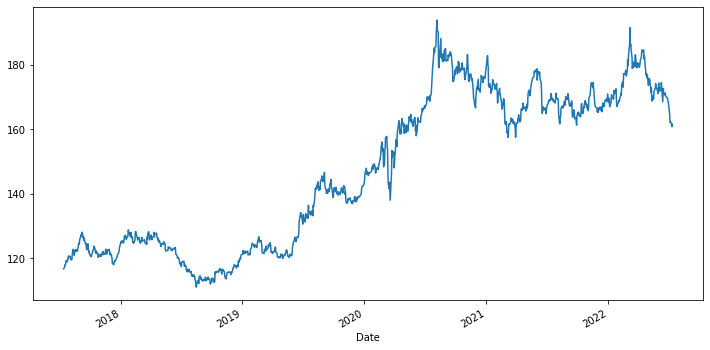

In [102]:
ts.Close.plot()

In [103]:
ema1 =50
ema2 =100 

In [104]:
ts.Close.isna().sum()

0

In [105]:
ts[f'{ema1}-day'] = ts['Close'].rolling(ema1).mean()
ts[f'{ema2}-day'] = ts['Close'].rolling(ema2).mean()
ts =ts.iloc[ema2:]

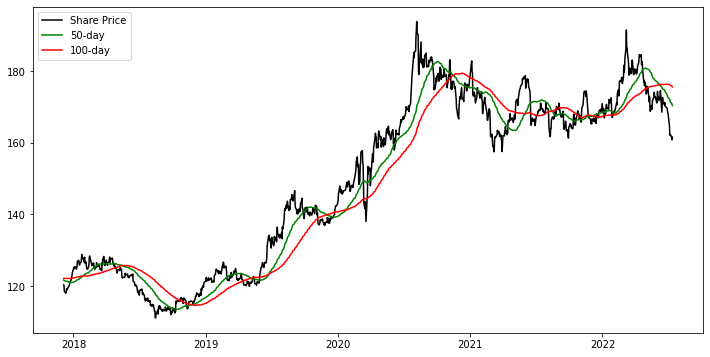

In [106]:
plt.plot(ts['Close'], label = 'Share Price', c = 'black')
plt.plot(ts[f'{ema1}-day'], label = f'{ema1}-day', c = 'green')
plt.plot(ts[f'{ema2}-day'], label = f'{ema2}-day', c = 'red')
plt.legend()

In [107]:
ts['signal'] = np.where(ts[f'{ema1}-day'] > ts[f'{ema2}-day'], 1, 0)
ts['signal'] = np.where(ts[f'{ema1}-day'] < ts[f'{ema2}-day'], -1, ts['signal'])
ts.dropna(inplace=True)
ts.head()

,day,Open,High,Low,Close,50-day,100-day,signal
Date,,,,,,,,
2017-12-05,101,120.099998,120.510002,119.720001,120.320000,121.6880,122.1274,-1
2017-12-06,102,120.040001,120.440002,119.870003,120.070000,121.6266,122.1552,-1
2017-12-07,103,119.010002,119.239998,118.099998,118.489998,121.5568,122.1590,-1
2017-12-08,104,118.489998,118.919998,118.330002,118.480003,121.4822,122.1630,-1
2017-12-11,105,118.370003,118.540001,117.800003,118.010002,121.4108,122.1607,-1


In [108]:
ts['return'] = np.log(ts['Close']).diff()
ts['system_return'] = ts['signal'] * ts['return']
ts['entry'] = ts.signal.diff()
ts.head()

,day,Open,High,Low,Close,50-day,100-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-12-05,101,120.099998,120.510002,119.720001,120.320000,121.6880,122.1274,-1,NaN,NaN,NaN
2017-12-06,102,120.040001,120.440002,119.870003,120.070000,121.6266,122.1552,-1,-0.002080,0.002080,0.0
2017-12-07,103,119.010002,119.239998,118.099998,118.489998,121.5568,122.1590,-1,-0.013246,0.013246,0.0
2017-12-08,104,118.489998,118.919998,118.330002,118.480003,121.4822,122.1630,-1,-0.000084,0.000084,0.0
2017-12-11,105,118.370003,118.540001,117.800003,118.010002,121.4108,122.1607,-1,-0.003975,0.003975,0.0


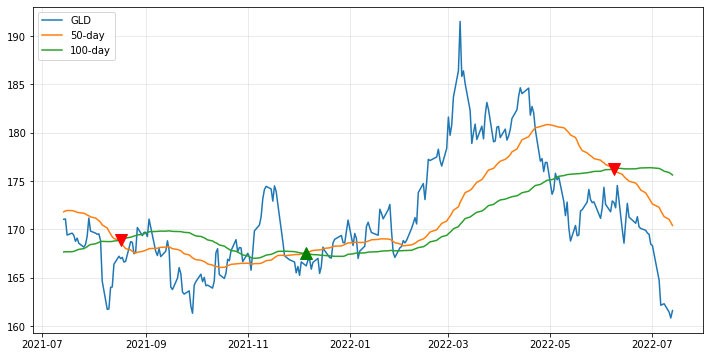

In [109]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(ts.iloc[-252:]['Close'], label = 'GLD')
plt.plot(ts.iloc[-252:][f'{ema1}-day'], label = f'{ema1}-day')
plt.plot(ts.iloc[-252:][f'{ema2}-day'], label = f'{ema2}-day')
plt.plot(ts[-252:].loc[ts.entry == 2].index, ts[-252:][f'{ema1}-day'][ts.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(ts[-252:].loc[ts.entry == -2].index, ts[-252:][f'{ema2}-day'][ts.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);